In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Go back to python 3.8
!conda install python=3.8

Retrieving notices: ...working... done
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::holoviews==1.15.0=py39hecd8cb5_0
  - defaults/noarch::conda-pack==0.6.0=pyhd3eb1b0_0
  - defaults/osx-64::scikit-learn==1.0.2=py39hae1ba45_1
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/osx-64::anaconda-project==0.11.1=py39hecd8cb5_0
  - defaults/noarch::backports.functools_lru_cache==1.6.4=pyhd3eb1b0_0
  - defaults/noarch::pyls-spyder==0.4.0=pyhd3eb1b0_0
  - defaults/osx-64::scikit-learn-intelex==2021.6.0=py39hecd8cb5_0
  - defaults/osx-64::jupyterlab==3.4.4=py39hecd8cb5_0
  - defaults/osx-64::datashader==0.14.1=py39hecd8cb5_0
  - defaults/osx-64::anaconda==2022.10=py39_0
  - defaults/osx-64::scrapy==2.6.2=py39hecd8cb5_0
  - defaults/noarch::jinja2==2.11.3=pyhd3eb1b0_0
  - defaults/osx-64::hvplot==0.8.0=py39hecd8cb5_0
  - defaults/noarch::nltk==3.7=pyhd3e

In [11]:
!pip install numpy==1.23.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 10.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.1 which is incompatible.


In [1]:
import numpy as np
import pickle
from gensim.models.keyedvectors import KeyedVectors

In [3]:
def load_keyed_vectors(year):
    vocab_path = f"/Users/parkermoesta/Library/Mobile Documents/com~apple~CloudDocs/NLP_projects/Word Embedding Biases/NLP_word_embedding_bias/sgns/{year}-vocab.pkl"
    embeddings_path = f"/Users/parkermoesta/Library/Mobile Documents/com~apple~CloudDocs/NLP_projects/Word Embedding Biases/NLP_word_embedding_bias/sgns/{year}-w.npy"
    
    with open(vocab_path, 'rb') as f:
        vocab = pickle.load(f)
    
    embeddings = np.load(embeddings_path)
    
    word_vectors = KeyedVectors(vector_size=embeddings.shape[1])
    word_vectors.add(vocab, embeddings)
    
    return word_vectors

In [4]:
kv_1920 = load_keyed_vectors(1920)

In [5]:
kv_1920.most_similar('doctor', topn=10)

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: invalid value encountered in divide
  return (m / dist).astype(REAL)


[('physician', 0.48775845766067505),
 ('lawyer', 0.448901504278183),
 ('bachelor', 0.448217511177063),
 ('surgeon', 0.42209064960479736),
 ('priest', 0.41550201177597046),
 ('dentist', 0.4108635187149048),
 ('doctors', 0.41083770990371704),
 ('bedside', 0.4006305932998657),
 ('nurse', 0.38979727029800415),
 ('medicine', 0.377765417098999)]

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: invalid value encountered in divide
  return (m / dist).astype(REAL)


IndexError: index 10 is out of bounds for axis 0 with size 9

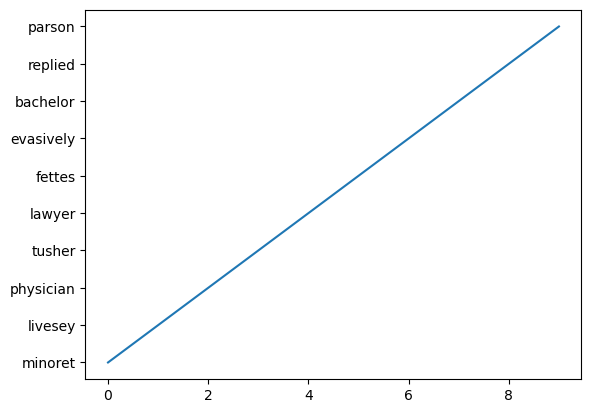

In [6]:
# Create a function that loops through 1900-1990 and returns the most similar words to 'doctor' and plots them on a visually appealing graph
import matplotlib.pyplot as plt
import numpy as np

def plot_similar_words(word, years):
    similar_words = {year: [w[0] for w in load_keyed_vectors(year).most_similar(word, topn=10)] for year in years}
    data = np.array([[i for i in range(len(similar_words[year]))] for year in years])
    for year in years:
        plt.plot(data[year-1900], similar_words[year], label=year)
    plt.legend()
    plt.show()

plot_similar_words('doctor', range(1900, 1990, 10))

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: invalid value encountered in divide
  return (m / dist).astype(REAL)
/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: invalid value encountered in divide
  return (m / dist).astype(REAL)
/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: invalid value encountered in divide
  return (m / dist).astype(REAL)
/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: invalid value encountered in divide
  return (m / dist).astype(REAL)
/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: invalid value encountered in divide
  return (m / dist).astype(REAL)
/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvect

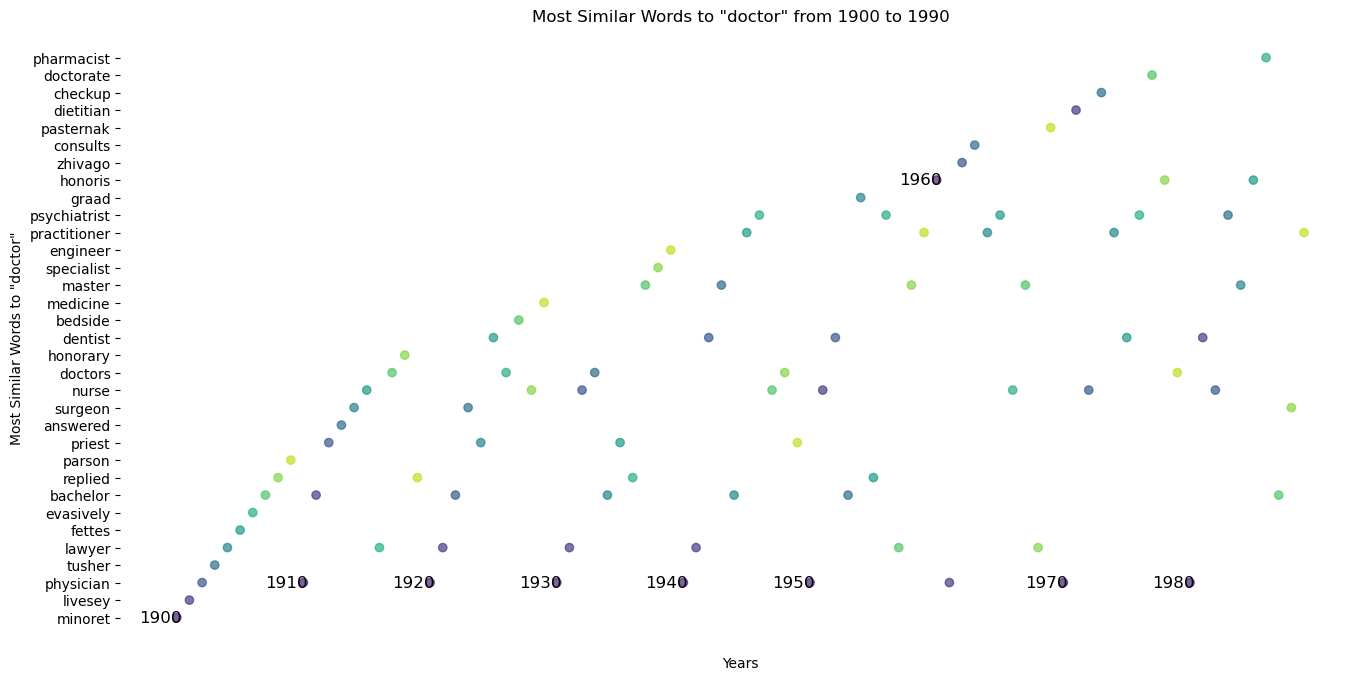

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_similar_words(word, years):
    plt.figure(figsize=(16, 8))
    
    # Set a color palette for better visualization
    color_palette = sns.color_palette("viridis", 10)
    
    for idx, year in enumerate(years):
        kv = load_keyed_vectors(year)
        similar_words = kv.most_similar(word, topn=10)
        
        # Get the word labels and similarity scores
        labels = [w[0] for w in similar_words]
        scores = [w[1] for w in similar_words]
        
        # Set the y coordinate for each year's words
        y_positions = np.arange(len(labels)) + idx * len(labels)
        
        # Plot the words as a scatter plot with color representing the similarity score
        plt.scatter(y_positions, labels, c=[color_palette[i] for i in range(len(labels))], alpha=0.7)
        
        # Add the year label to the left of the words
        plt.text(y_positions[0] - 3, labels[0], str(year), fontsize=12, verticalalignment='center')
    
    plt.xticks([])
    plt.xlabel('Years')
    plt.ylabel('Most Similar Words to "{}"'.format(word))
    plt.title('Most Similar Words to "{}" from 1900 to 1990'.format(word))
    sns.despine(left=True, bottom=True)
    plt.show()

plot_similar_words('doctor', range(1900, 1990, 10))


/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors

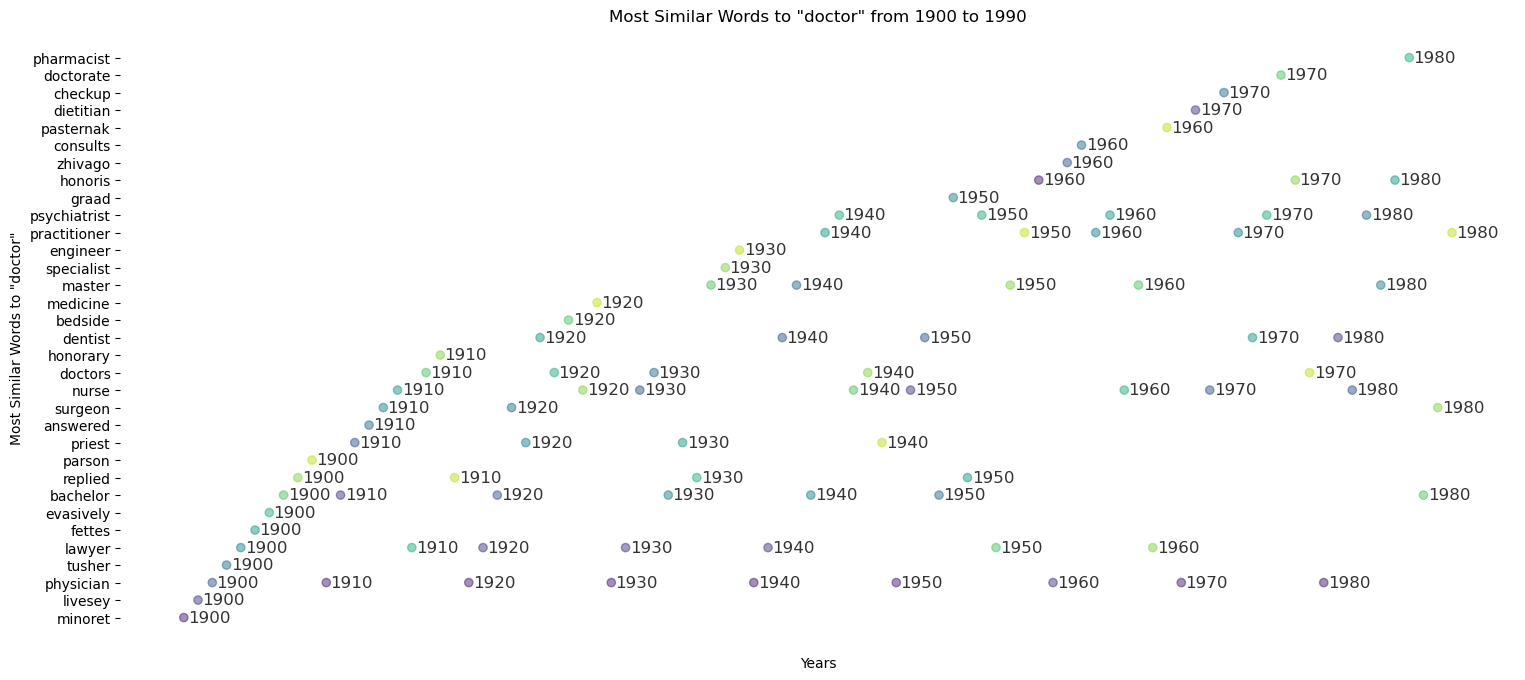

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_similar_words(word, years):
    plt.figure(figsize=(18, 8))
    
    # Set a color palette for better visualization
    color_palette = sns.color_palette("viridis", 10)
    
    for idx, year in enumerate(years):
        kv = load_keyed_vectors(year)
        similar_words = kv.most_similar(word, topn=10)
        
        # Get the word labels and similarity scores
        labels = [w[0] for w in similar_words]
        scores = [w[1] for w in similar_words]
        
        # Set the y coordinate for each year's words
        y_positions = np.arange(len(labels)) + idx * len(labels)
        
        # Plot the words as a scatter plot with color representing the similarity score
        plt.scatter(y_positions, labels, c=[color_palette[i] for i in range(len(labels))], alpha=0.5)
        
        # Add the year label to the right of the words
        for i, label in enumerate(labels):
            plt.text(y_positions[i] + 0.3, label, str(year), fontsize=12, verticalalignment='center', alpha=0.8)
    
    plt.xticks([])
    plt.xlabel('Years')
    plt.ylabel('Most Similar Words to "{}"'.format(word))
    plt.title('Most Similar Words to "{}" from 1900 to 1990'.format(word))
    sns.despine(left=True, bottom=True)
    plt.show()

plot_similar_words('doctor', range(1900, 1990, 10))


/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors

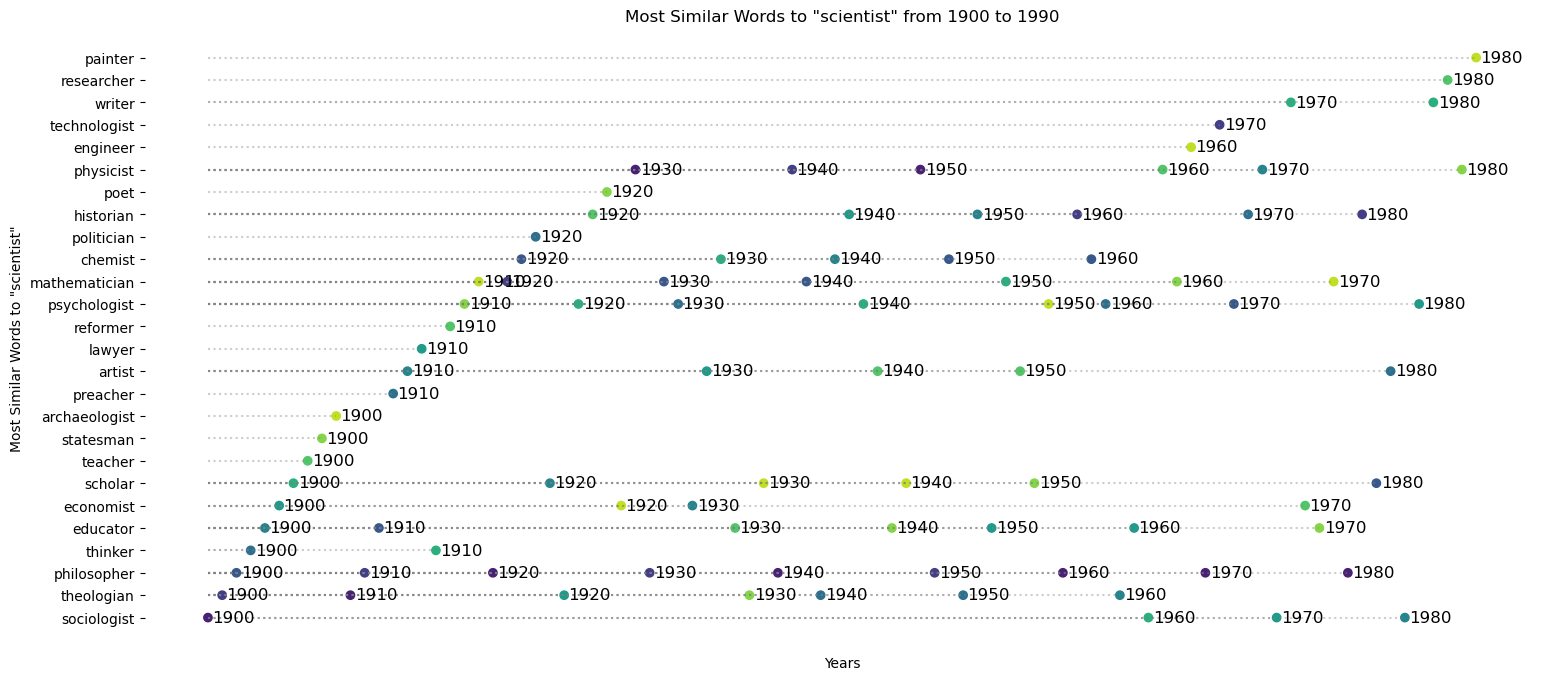

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_similar_words(word, years):
    plt.figure(figsize=(18, 8))
    
    # Set a color palette for better visualization
    color_palette = sns.color_palette("viridis", 10)
    
    for idx, year in enumerate(years):
        kv = load_keyed_vectors(year)
        similar_words = kv.most_similar(word, topn=10)
        
        # Get the word labels and similarity scores
        labels = [w[0] for w in similar_words]
        scores = [w[1] for w in similar_words]
        
        # Set the y coordinate for each year's words
        y_positions = np.arange(len(labels)) + idx * len(labels)
        
        # Plot the words as a scatter plot with color representing the similarity score
        plt.scatter(y_positions, labels, c=[color_palette[i] for i in range(len(labels))], alpha=1.0)
        
        # Add the year label to the right of the words
        for i, label in enumerate(labels):
            plt.text(y_positions[i] + 0.3, label, str(year), fontsize=12, verticalalignment='center', alpha=1)
            
            # Add a dotted horizontal line from each word to the nearest dot on the x-axis
            plt.hlines(label, 0, y_positions[i], colors='gray', linestyles='dotted', alpha=0.4)
    
    plt.xticks([])
    plt.xlabel('Years')
    plt.ylabel('Most Similar Words to "{}"'.format(word))
    plt.title('Most Similar Words to "{}" from 1900 to 1990'.format(word))
    sns.despine(left=True, bottom=True)
    plt.show()

plot_similar_words('scientist', range(1900, 1990, 10))


/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors

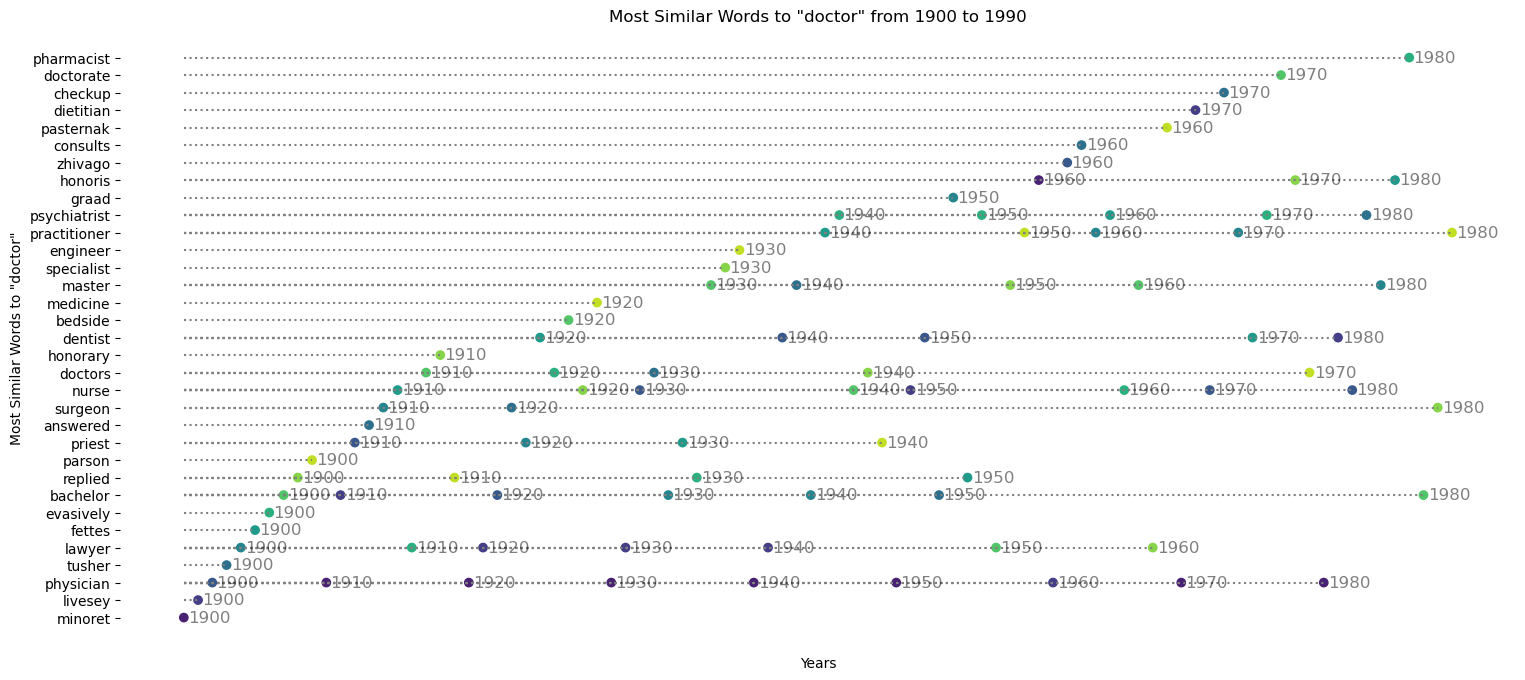

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_similar_words(word, years):
    plt.figure(figsize=(18, 8))
    
    # Set a color palette for better visualization
    color_palette = sns.color_palette("viridis", 10)
    
    for idx, year in enumerate(years):
        kv = load_keyed_vectors(year)
        similar_words = kv.most_similar(word, topn=10)
        
        # Get the word labels and similarity scores
        labels = [w[0] for w in similar_words]
        scores = [w[1] for w in similar_words]
        
        # Set the y coordinate for each year's words
        y_positions = np.arange(len(labels)) + idx * len(labels)
        
        # Plot the words as a scatter plot with color representing the similarity score
        plt.scatter(y_positions, labels, c=[color_palette[i] for i in range(len(labels))], alpha=1.0)
        
        # Add the year label to the right of the words
        for i, label in enumerate(labels):
            plt.text(y_positions[i] + 0.3, label, str(year), fontsize=12, verticalalignment='center', alpha=0.5)
            
            # Add a dotted horizontal line from each word to the nearest dot on the x-axis
            plt.plot([0, y_positions[i]], [label, label], color='gray', linestyle='dotted', alpha=1)
    
    plt.xticks([])
    plt.xlabel('Years')
    plt.ylabel('Most Similar Words to "{}"'.format(word))
    plt.title('Most Similar Words to "{}" from 1900 to 1990'.format(word))
    sns.despine(left=True, bottom=True)
    plt.show()

plot_similar_words('doctor', range(1900, 1990, 10))


In [41]:
import plotly.graph_objs as go
import numpy as np

def plot_similar_words(word, years):
    traces = []
    
    for idx, year in enumerate(years):
        kv = load_keyed_vectors(year)
        similar_words = kv.most_similar(word, topn=10)
        
        # Get the word labels and similarity scores
        labels = [w[0] for w in similar_words]
        scores = [w[1] for w in similar_words]
        
        # Set the y coordinate for each year's words
        y_positions = np.arange(len(labels)) + idx * len(labels)
        
        # Create a scatter plot with color representing the similarity score
        trace = go.Scatter(
            x=y_positions,
            y=labels, 
            mode='markers',
            marker=dict(
                size=10,
                color=scores,
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title='Similarity Score',thickness=20, len=2, yanchor='middle', y=1)
            ),
            text=[str(year)] * len(labels),
            name=str(year)
        )
        
        traces.append(trace)
    
    layout = go.Layout(
        title=f'Most Similar Words to "{word}" from 1900 to 1990',
        xaxis=dict(title='Years', tickvals=[], showticklabels=False),
        yaxis=dict(title=f'Most Similar Words to "{word}"'),
        showlegend=False
    )
    
    fig = go.Figure(data=traces, layout=layout)
    fig.show()

plot_similar_words('doctor', range(1900, 1990, 10))


/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning:

invalid value encountered in divide

/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors

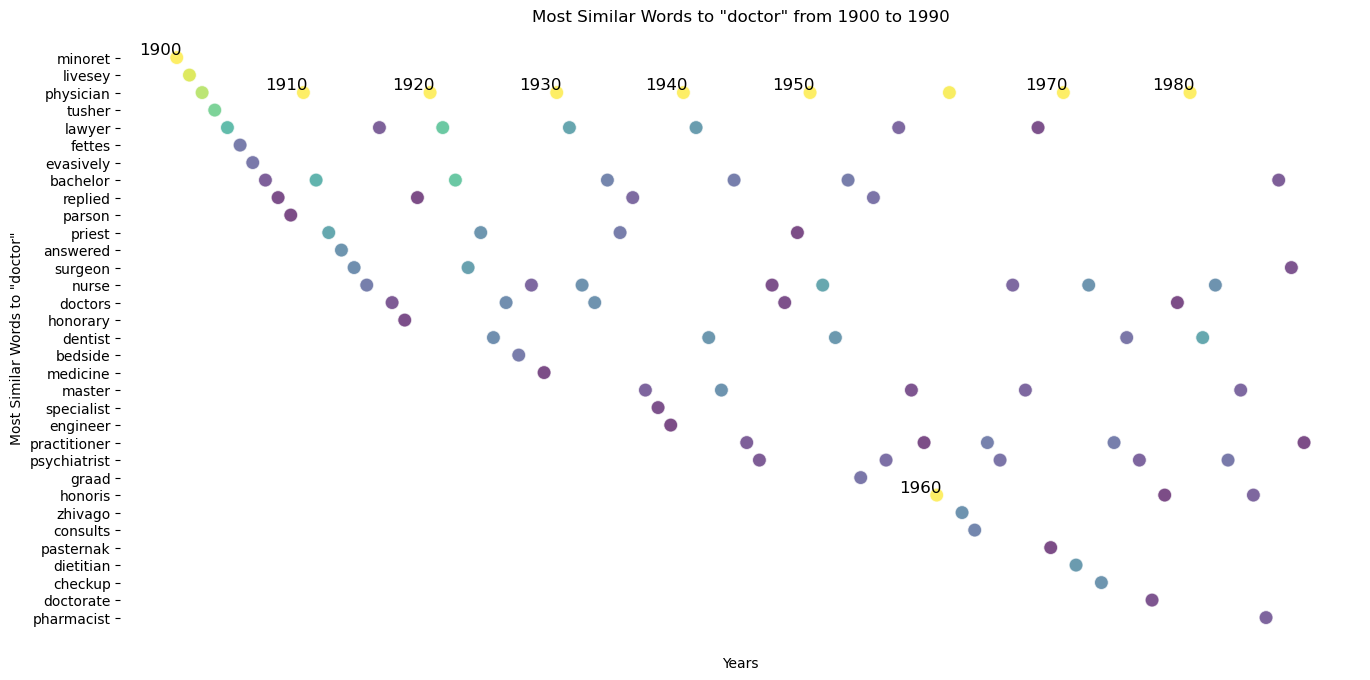

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_similar_words(word, years):
    plt.figure(figsize=(16, 8))
    
    for idx, year in enumerate(years):
        kv = load_keyed_vectors(year)
        similar_words = kv.most_similar(word, topn=10)
        
        # Get the word labels and similarity scores
        labels = [w[0] for w in similar_words]
        scores = [w[1] for w in similar_words]
        
        # Set the y coordinate for each year's words
        y_positions = np.arange(len(labels)) + idx * len(labels)
        
        # Create a scatter plot with color representing the similarity score
        ax = sns.scatterplot(
            x=y_positions,
            y=labels,
            hue=scores,
            palette='viridis',
            legend=None,
            s=100,
            alpha=0.7
        )
        
        # Add the year label to the left of the words
        plt.text(y_positions[0] - 3, labels[0], str(year), fontsize=12, verticalalignment='bottom')
    
    plt.xticks([], [])
    plt.xlabel('Years')
    plt.ylabel('Most Similar Words to "{}"'.format(word))
    plt.title('Most Similar Words to "{}" from 1900 to 1990'.format(word))
    sns.despine(left=True, bottom=True)
    plt.show()

plot_similar_words('doctor', range(1900, 1990, 10))


In [31]:
import plotly.graph_objs as go
import numpy as np

def plot_similar_words(word, years):
    traces = []
    
    for idx, year in enumerate(years):
        kv = load_keyed_vectors(year)
        similar_words = kv.most_similar(word, topn=10)
        
        # Get the word labels and similarity scores
        labels = [w[0] for w in similar_words]
        scores = [w[1] for w in similar_words]
        
        # Set the x coordinate for each year's words
        x_positions = np.arange(len(labels)) + idx * len(labels)
        
        # Create a scatter plot with color representing the similarity score
        trace = go.Scatter(
            x=[str(year)] * len(labels),
            y=labels,
            mode='markers',
            marker=dict(
                size=10,
                color=scores,
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title='Similarity Score', x=1.1, y=0.5, len=1.5, thickness=20)
            ),
            #text=[str(year)] * len(labels),
            #name=str(year),
            showlegend=False
        )
        
        traces.append(trace)
    
    layout = go.Layout(
        title=f'Most Similar Words to "{word}" from 1900 to 1990',
        xaxis=dict(title='Years', tickvals=[str(year) for year in years], ticktext=[str(year) for year in years]),
        yaxis=dict(title=f'Most Similar Words to "{word}"'),
    )
    
    fig = go.Figure(data=traces, layout=layout)
    fig.show()

plot_similar_words('doctor', range(1900, 1990, 10))


/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: invalid value encountered in divide
  return (m / dist).astype(REAL)
/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: invalid value encountered in divide
  return (m / dist).astype(REAL)
/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: invalid value encountered in divide
  return (m / dist).astype(REAL)
/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: invalid value encountered in divide
  return (m / dist).astype(REAL)
/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: invalid value encountered in divide
  return (m / dist).astype(REAL)
/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvect

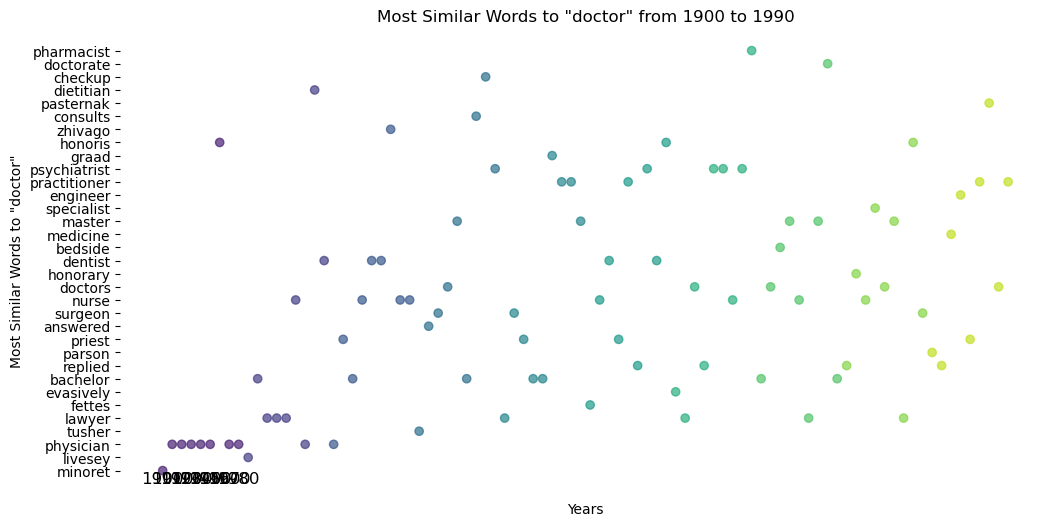

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_similar_words(word, years):
    plt.figure(figsize=(12, 6))
    
    # Set a color palette for better visualization
    color_palette = sns.color_palette("viridis", 10)
    
    for idx, year in enumerate(years):
        kv = load_keyed_vectors(year)
        similar_words = kv.most_similar(word, topn=10)
        
        # Get the word labels and similarity scores
        labels = [w[0] for w in similar_words]
        scores = [w[1] for w in similar_words]
        
        # Set the x coordinate for each year's words
        x_positions = np.arange(len(labels)) * len(years) + idx
        
        # Plot the words as a scatter plot with color representing the similarity score
        plt.scatter(x_positions, labels, c=[color_palette[i] for i in range(len(labels))], alpha=0.7)
        
        # Add the year label to the top of the words
        plt.text(x_positions[0], -1, str(year), fontsize=12, horizontalalignment='center')
    
    plt.xticks([])
    plt.xlabel('Years')
    plt.ylabel('Most Similar Words to "{}"'.format(word))
    plt.title('Most Similar Words to "{}" from 1900 to 1990'.format(word))
    sns.despine(left=True, bottom=True)
    plt.show()

plot_similar_words('doctor', range(1900, 1990, 10))


In [2]:

# Load the vocabulary and embeddings
with open('/Users/parkermoesta/Library/Mobile Documents/com~apple~CloudDocs/NLP_projects/Word Embedding Biases/NLP_word_embedding_bias/sgns/1950-vocab.pkl', 'rb') as f:
    vocab_pkl_50 = pickle.load(f)

embeddings_npy_50 = np.load('/Users/parkermoesta/Library/Mobile Documents/com~apple~CloudDocs/NLP_projects/Word Embedding Biases/NLP_word_embedding_bias/sgns/1950-w.npy')

# Create a Gensim KeyedVectors object
word_vectors = KeyedVectors(vector_size=embeddings_npy_50.shape[1])
word_vectors.add(vocab_pkl_50, embeddings_npy_50)

# Find the top 5 most similar words to 'doctor'
similar_words = word_vectors.most_similar('doctor', topn=5)
print("Similar words to 'doctor':", similar_words)

# Solve the analogy: man : king :: woman : ?
analogy_result = word_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print("man : king :: woman :", analogy_result[0][0])

Similar words to 'doctor': [('physician', 0.5404788255691528), ('nurse', 0.4563051760196686), ('dentist', 0.44282329082489014), ('bachelor', 0.42093425989151), ('graad', 0.41631847620010376)]
man : king :: woman : queen


/Users/parkermoesta/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: invalid value encountered in divide
  return (m / dist).astype(REAL)


In [5]:
word_vectors.most_similar('computer', topn=20)

[('programmed', 0.5609990358352661),
 ('digital', 0.539150059223175),
 ('computers', 0.47976386547088623),
 ('electronic', 0.4129878878593445),
 ('machine', 0.3974563479423523),
 ('aiee', 0.38625895977020264),
 ('automatic', 0.37560877203941345),
 ('ibm', 0.3687945604324341),
 ('calculator', 0.35465943813323975),
 ('circuits', 0.3521408438682556),
 ('analog', 0.3473367691040039),
 ('voltmeter', 0.3413568139076233),
 ('tape', 0.33817723393440247),
 ('input', 0.33275437355041504),
 ('speed', 0.3305101692676544),
 ('processing', 0.3260788023471832),
 ('programming', 0.32261836528778076),
 ('integrator', 0.3196113407611847),
 ('operator', 0.3194192349910736),
 ('automatically', 0.31526678800582886)]

In [15]:
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
for model_name, model_data in sorted(info['models'].items()):
    print(
        '%s (%d records): %s' % (
            model_name.ljust(200),
            model_data.get('num_records', -1),
            model_data['description'][:200] + '...'
    ))

__testing_word2vec-matrix-synopsis                                                                                                                                                                       (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors of the movie matrix....
conceptnet-numberbatch-17-06-300                                                                                                                                                                         (1917247 records): ConceptNet Numberbatch consists of state-of-the-art semantic vectors (also known as word embeddings) that can be used directly as a representation of word meanings or as a starting point for further m...
fasttext-wiki-news-subwords-300                                                                                                                                                                          (999999 records): 1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and stat